In [7]:
import mne
import getData
import numpy as np
from mne import Epochs
from mne.io import concatenate_raws, read_raw_edf
from sklearn.model_selection import train_test_split

#tmin, tmax = -0., 1
tmin, tmax = -1, 4

#Define the parameters 
subject_Inicial = 1  # use data from subject subject_Inicial
subject_Final = 109  # to subject subject_Final
#runs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  
runs = [3, 7, 11] # use only left and right fist runs 

# Call method to get the combination raw for each subject and append it to a list of raws
raw_tareas_por_sujeto = [getData.get_raw_from_subject_tasks(i, runs) for i in range(subject_Inicial, subject_Final) if getData.get_raw_from_subject_tasks(i, runs)]

# Combine the raws with the information of each subjects specified runs
raw_global_sujetos = concatenate_raws(raw_tareas_por_sujeto)

# Obtain the events from the global raw object
events, event_ids = mne.events_from_annotations(raw_global_sujetos, event_id='auto')
# Obtain the epochs from the global raw object
epochs = mne.Epochs(raw_global_sujetos, events, event_ids, tmin, tmax, baseline=None, preload=True)

Extracting EDF parameters from c:\Users\agusa\Documents\TFM\Python\dataset\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from c:\Users\agusa\Documents\TFM\Python\dataset\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from c:\Users\agusa\Documents\TFM\Python\dataset\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from c:\Users\agusa\Documents\TFM\Python\dataset\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R03.edf...
EDF file detected
Setting channel info structure...
Cre

In [8]:
# We get the data, multiplying the data by 1000 for apply scaling (recommended preprocessing) and get a better sensibility for  deep learning algorithms
X = epochs.get_data()*1000 # the data has the format: (trials, channels, samples)
y = epochs.events[:, -1]

In [9]:
print(X.shape)
print(y.shape)

(291, 64, 641)
(291,)


In [10]:
import collections, numpy

# Count the number of values of each class
collections.Counter(y)

Counter({2: 76, 1: 141, 3: 74})

------------------------------------------------------------------------
Training for fold 1 ...
3171
------------------------------EEGNet------------------------------------
Confusion Matrix

[[12  1  1]
 [ 2  5  1]
 [ 2  1  5]]

Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.73
Macro Recall: 0.70
Macro F1-score: 0.71

Weighted Precision: 0.73
Weighted Recall: 0.73
Weighted F1-score: 0.73

Classification Report

                  precision    recall  f1-score   support

            Rest       0.75      0.86      0.80        14
 Close left fist       0.71      0.62      0.67         8
Close right fist       0.71      0.62      0.67         8

        accuracy                           0.73        30
       macro avg       0.73      0.70      0.71        30
    weighted avg       0.73      0.73      0.73        30



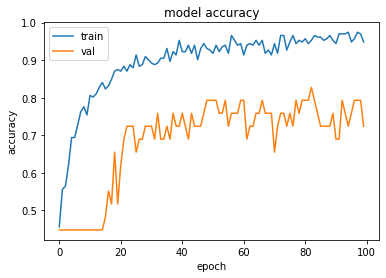

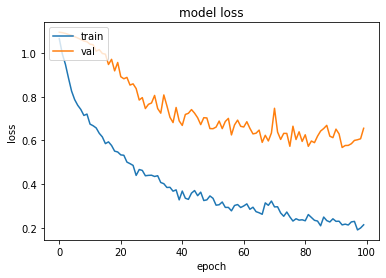

-----------------------------Gaussian-----------------------------------
Confusion Matrix

[[11  2  1]
 [ 4  3  1]
 [ 1  3  4]]

Accuracy: 0.60

Micro Precision: 0.60
Micro Recall: 0.60
Micro F1-score: 0.60

Macro Precision: 0.58
Macro Recall: 0.55
Macro F1-score: 0.56

Weighted Precision: 0.60
Weighted Recall: 0.60
Weighted F1-score: 0.59

Classification Report

                  precision    recall  f1-score   support

            Rest       0.69      0.79      0.73        14
 Close left fist       0.38      0.38      0.38         8
Close right fist       0.67      0.50      0.57         8

        accuracy                           0.60        30
       macro avg       0.58      0.55      0.56        30
    weighted avg       0.60      0.60      0.59        30

------------------------------------------------------------------------
Training for fold 2 ...
3171
------------------------------EEGNet------------------------------------
Confusion Matrix

[[15  0  1]
 [ 0  2  1]
 [ 1  1 

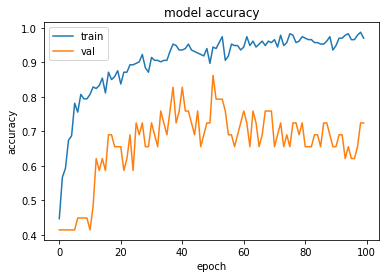

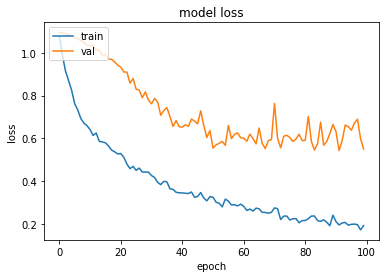

-----------------------------Gaussian-----------------------------------
Confusion Matrix

[[15  1  0]
 [ 0  1  2]
 [ 3  0  7]]

Accuracy: 0.79

Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

Macro Precision: 0.70
Macro Recall: 0.66
Macro F1-score: 0.67

Weighted Precision: 0.78
Weighted Recall: 0.79
Weighted F1-score: 0.78

Classification Report

                  precision    recall  f1-score   support

            Rest       0.83      0.94      0.88        16
 Close left fist       0.50      0.33      0.40         3
Close right fist       0.78      0.70      0.74        10

        accuracy                           0.79        29
       macro avg       0.70      0.66      0.67        29
    weighted avg       0.78      0.79      0.78        29

------------------------------------------------------------------------
Training for fold 3 ...
3171
------------------------------EEGNet------------------------------------
Confusion Matrix

[[13  1  1]
 [ 2  3  2]
 [ 3  0 

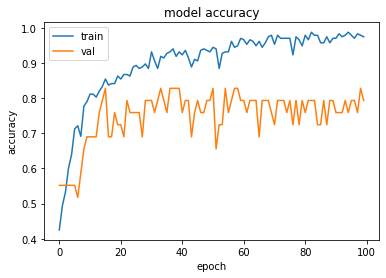

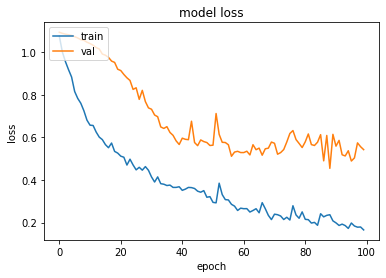

-----------------------------Gaussian-----------------------------------
Confusion Matrix

[[12  1  2]
 [ 1  5  1]
 [ 2  0  5]]

Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.75
Macro Recall: 0.74
Macro F1-score: 0.75

Weighted Precision: 0.77
Weighted Recall: 0.76
Weighted F1-score: 0.76

Classification Report

                  precision    recall  f1-score   support

            Rest       0.80      0.80      0.80        15
 Close left fist       0.83      0.71      0.77         7
Close right fist       0.62      0.71      0.67         7

        accuracy                           0.76        29
       macro avg       0.75      0.74      0.75        29
    weighted avg       0.77      0.76      0.76        29

------------------------------------------------------------------------
Training for fold 4 ...
3171
------------------------------EEGNet------------------------------------
Confusion Matrix

[[12  0  2]
 [ 3  6  1]
 [ 0  1 

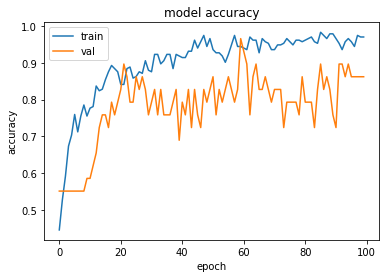

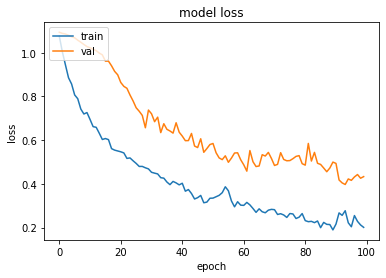

-----------------------------Gaussian-----------------------------------
Confusion Matrix

[[7 2 5]
 [3 7 0]
 [0 0 5]]

Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

Macro Precision: 0.66
Macro Recall: 0.73
Macro F1-score: 0.66

Weighted Precision: 0.69
Weighted Recall: 0.66
Weighted F1-score: 0.65

Classification Report

                  precision    recall  f1-score   support

            Rest       0.70      0.50      0.58        14
 Close left fist       0.78      0.70      0.74        10
Close right fist       0.50      1.00      0.67         5

        accuracy                           0.66        29
       macro avg       0.66      0.73      0.66        29
    weighted avg       0.69      0.66      0.65        29

------------------------------------------------------------------------
Training for fold 5 ...
3171
------------------------------EEGNet------------------------------------
Confusion Matrix

[[11  0  2]
 [ 1  9  2]
 [ 1  3  0]]

Acc

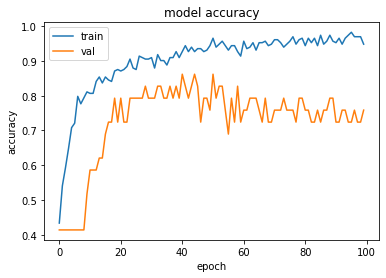

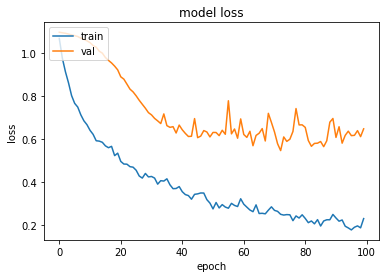

-----------------------------Gaussian-----------------------------------
Confusion Matrix

[[9 3 1]
 [3 5 4]
 [2 0 2]]

Accuracy: 0.55

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.52
Macro Recall: 0.54
Macro F1-score: 0.51

Weighted Precision: 0.59
Weighted Recall: 0.55
Weighted F1-score: 0.56

Classification Report

                  precision    recall  f1-score   support

            Rest       0.64      0.69      0.67        13
 Close left fist       0.62      0.42      0.50        12
Close right fist       0.29      0.50      0.36         4

        accuracy                           0.55        29
       macro avg       0.52      0.54      0.51        29
    weighted avg       0.59      0.55      0.56        29



In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import methodsEEG
import numpy as np
import methodsLinearClassifiers

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# Define number of kernels, channels and samples
kernels, chans, samples = 1, X.shape[1], X.shape[2]

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

    X_train_EEG, X_validate_EEG, X_test_EEG, y_train_EEG, y_validate_EEG, y_test_EEG = methodsEEG.transformParameters(kernels,      chans, samples, X, y, X_train, X_validate, X_test, y_train, y_validate, y_test)

    # Train the model
    model, history = methodsEEG.trainModel_EEG(kernels, chans, samples, X, y, X_train_EEG, X_validate_EEG, X_test_EEG, y_train_EEG, y_validate_EEG, y_test_EEG, 100)
    print('------------------------------EEGNet------------------------------------')
    methodsEEG.predictModel_EEG(model, X_test_EEG, y_test_EEG)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    acc_per_fold.append(history.history['accuracy'])
    loss_per_fold.append(history.history['loss'])
    val_acc_per_fold.append(history.history['val_accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])

    # Train the classifier
    print('-----------------------------Gaussian-----------------------------------')
    classifier = methodsLinearClassifiers.trainAndPredictGaussianNB(chans, samples, X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG)

    # Increase fold number
    fold_no = fold_no + 1